# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

**This graph is useful since it distills the three features into two, allowing us to see outliers within our dataset across all features. It is simpler than a pair plot to look at, though it is more difficult to understand the meaning of the axes. It presents a great visualization of the relationships between variables - especially accompanied by the components and their explained variance ratios. It does show that there is little relationship between series 3 and the other two (which are likely strongly correlated as their variance is explained together by component 2).**

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

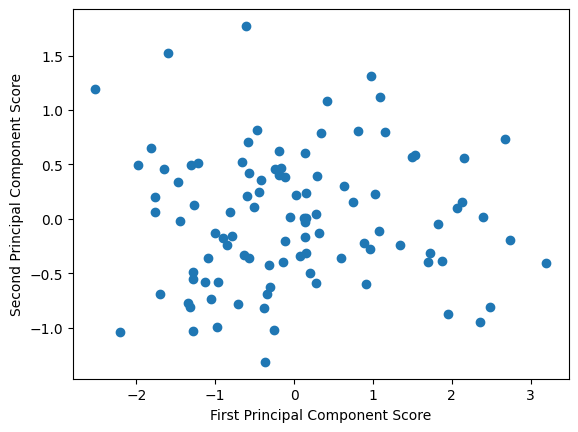

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

*It captured approximately 95% of the variance, though it wasn't super meaning full since these were categorical for the most part and there was little variance in all directions*

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?
*The most effective set of features was the most comprehensive set.*

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!
*I am not convinced this data is usable as I was unable to combine with the plays data since my python instance cannot handle the size for operations in memory. That being said, with some sort of paid cloud computing option, I believe there are valuable insights to be drawn here. Also, from the limited analysis I was able to do, the correlations and trends are as I expected.*

Do you see any outliers? (Data points that are far from the rest of the data).
*Being primarily categorical, this does not apply much, however there were outliers of players with a low number of total plays but a High number of days missed - which makes sense, they got injured early and for a long time and didn't play much.*

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?
*In my opinion, no. This is because the variation from one to zero does not present much from PCA to extrapolate from.*

Try using your correlation information from previous weeks to help choose features for linear regression.

In [2]:
# Reading in the processed data from Milestone 3
injury = pd.read_csv('../Semester-2/AI4L/data/injuryrecord_post.csv')
plays = pd.read_csv('../Semester-2/AI4L/data/playlist_post.csv')

In [ ]:
# Print Heads
injury.head()

,PlayerKey,GameID,PlayKey,DM_M1,DM_M7,DM_M28,DM_M42,BodyPart_Ankle,BodyPart_Foot,BodyPart_Knee,Surface_Natural,Surface_Synthetic
0,39873,39873-4,39873-4-32,1,1,1,1,0,0,1,0,1
1,46074,46074-7,46074-7-26,1,1,0,0,0,0,1,1,0
2,36557,36557-1,36557-1-70,1,1,1,1,1,0,0,0,1
3,46646,46646-3,46646-3-30,1,0,0,0,1,0,0,1,0
4,43532,43532-5,43532-5-69,1,1,1,1,1,0,0,0,1


In [5]:
plays.head()

,PlayerKey,GameID,PlayKey,PlayerDay,PlayerGame,Temperature,PlayerGamePlay,Precipitation,Position_C,Position_CB,...,PlayType_Extra Point,PlayType_Field Goal,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Not Returned,PlayType_Punt Returned,PlayType_Rush
0,26624,26624-1,26624-1-1,1,1,63,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,26624,26624-1,26624-1-2,1,1,63,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,26624,26624-1,26624-1-3,1,1,63,3,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,26624,26624-1,26624-1-4,1,1,63,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,26624,26624-1,26624-1-5,1,1,63,5,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
# Print info
injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PlayerKey          77 non-null     int64 
 1   GameID             77 non-null     object
 2   PlayKey            77 non-null     object
 3   DM_M1              77 non-null     int64 
 4   DM_M7              77 non-null     int64 
 5   DM_M28             77 non-null     int64 
 6   DM_M42             77 non-null     int64 
 7   BodyPart_Ankle     77 non-null     int64 
 8   BodyPart_Foot      77 non-null     int64 
 9   BodyPart_Knee      77 non-null     int64 
 10  Surface_Natural    77 non-null     int64 
 11  Surface_Synthetic  77 non-null     int64 
dtypes: int64(10), object(2)
memory usage: 7.3+ KB


In [7]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266314 entries, 0 to 266313
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   PlayerKey                      266314 non-null  int64 
 1   GameID                         266314 non-null  object
 2   PlayKey                        266314 non-null  object
 3   PlayerDay                      266314 non-null  int64 
 4   PlayerGame                     266314 non-null  int64 
 5   Temperature                    266314 non-null  int64 
 6   PlayerGamePlay                 266314 non-null  int64 
 7   Precipitation                  266314 non-null  int64 
 8   Position_C                     266314 non-null  int64 
 9   Position_CB                    266314 non-null  int64 
 10  Position_DB                    266314 non-null  int64 
 11  Position_DE                    266314 non-null  int64 
 12  Position_DT                    266314 non-nu

In [10]:
plays_injuries = plays.merge(injury, on=['PlayerKey', 'GameID', 'PlayKey'], how='left').fillna(0)

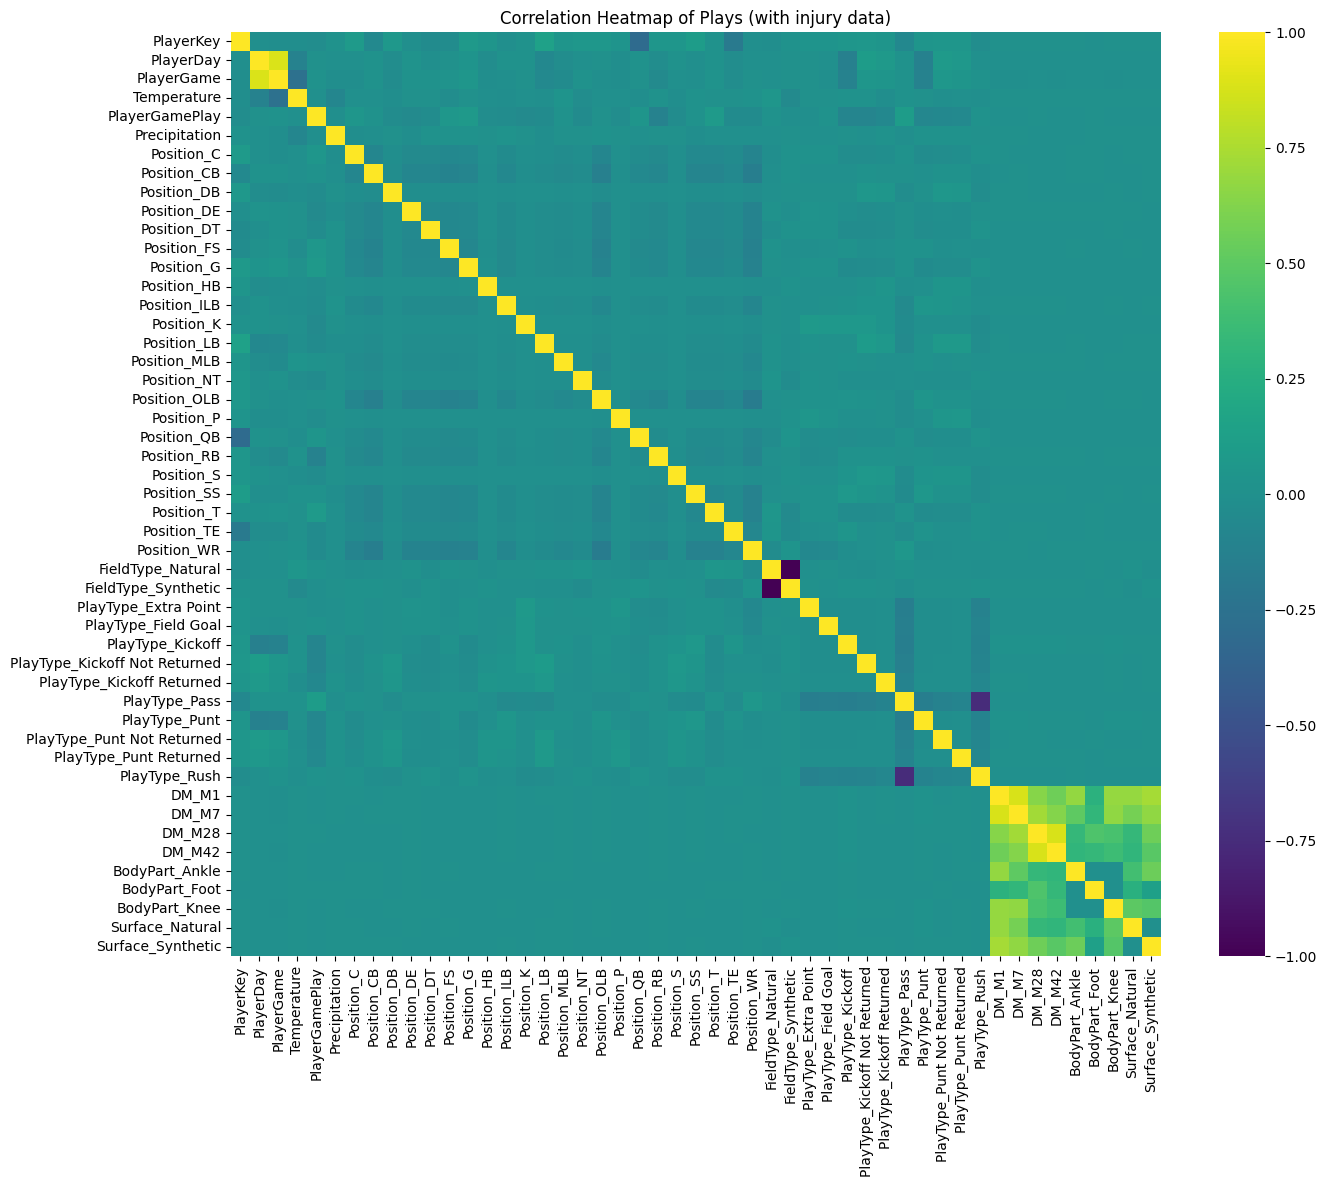

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corrmat = plays_injuries.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corrmat, annot=False, cmap='viridis')
plt.title('Correlation Heatmap of Plays (with injury data)')
plt.show()

In [30]:
# Used Chatgpt for this: After providing the names of the columns in the combined dataframe, I asked:
# "Make a pivot table of players with the counts of each kind of play, plays ran on synthetic/natural grass, and injuries for example?" Then:
# "Can you add the position in as a string from the onehot encoded columns?"
# "Can you make "

# 1. Select relevant columns
playtype_cols = [col for col in plays_injuries.columns if 'PlayType_' in col]
surface_cols = [col for col in plays_injuries.columns if 'Surface_' in col]
injury_cols = [col for col in plays_injuries.columns if 'BodyPart_' in col]

# 2. Handle DM (days missed)
dm_cols = [col for col in plays_injuries.columns if col.startswith('DM_M')]

# Map DM column names to days
dm_days_map = {col: int(col.split('_M')[1]) for col in dm_cols}

# For each row, get the max days missed (based on which DM columns are 1)
def get_max_days(row):
    for col in sorted(dm_cols, key=lambda x: -dm_days_map[x]):
        if row[col] == 1:
            return dm_days_map[col]
    return 0

# Apply row-wise to create a new column
plays_injuries['DaysMissed'] = plays_injuries[dm_cols].apply(get_max_days, axis=1)

# 3. Group and sum per player (including total days missed)
player_summary = plays_injuries.groupby('PlayerKey')[
    playtype_cols + surface_cols + injury_cols + ['DaysMissed']
].sum().reset_index()

# 4. Get the position columns
position_cols = [col for col in plays_injuries.columns if col.startswith('Position_')]

# 5. For each player, get the most frequent position
position_df = plays_injuries.groupby('PlayerKey')[position_cols].sum()
position_series = position_df.idxmax(axis=1).str.replace('Position_', '')

# 6. Merge into player_summary
player_summary = player_summary.merge(position_series.rename('Position'), on='PlayerKey')

In [31]:
player_summary

,PlayerKey,PlayType_Extra Point,PlayType_Field Goal,PlayType_Kickoff,PlayType_Kickoff Not Returned,PlayType_Kickoff Returned,PlayType_Pass,PlayType_Punt,PlayType_Punt Not Returned,PlayType_Punt Returned,PlayType_Rush,Surface_Natural,Surface_Synthetic,BodyPart_Ankle,BodyPart_Foot,BodyPart_Knee,DaysMissed,Position
0,26624,0,0,0,0,0,1275,0,0,0,900,0.0,0.0,0.0,0.0,0.0,0,QB
1,27363,0,0,0,0,0,1127,0,0,0,877,0.0,0.0,0.0,0.0,0.0,0,QB
2,30068,0,0,2,1,0,1230,0,0,0,710,0.0,0.0,0.0,0.0,0.0,0,WR
3,30953,0,1,0,0,0,601,0,0,0,394,0.0,0.0,0.0,0.0,0.0,0,ILB
4,31070,0,0,0,0,1,179,11,17,11,57,1.0,0.0,0.0,0.0,1.0,42,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,47550,0,0,0,27,16,71,0,11,11,213,0.0,0.0,0.0,0.0,0.0,0,RB
246,47784,0,0,0,26,19,224,0,19,16,119,0.0,0.0,0.0,0.0,0.0,0,WR
247,47813,10,7,0,51,32,49,0,54,45,37,0.0,1.0,1.0,0.0,0.0,7,CB
248,47820,6,8,0,43,16,28,0,31,33,19,0.0,0.0,0.0,0.0,0.0,0,CB


I could not think of another bubbleplot that worked for my data since it was mostly categorical or within the same type of info, like PlayType for example. Rush vs Pass is not super useful information.

<Axes: xlabel='PlayType_Pass', ylabel='PlayType_Rush'>

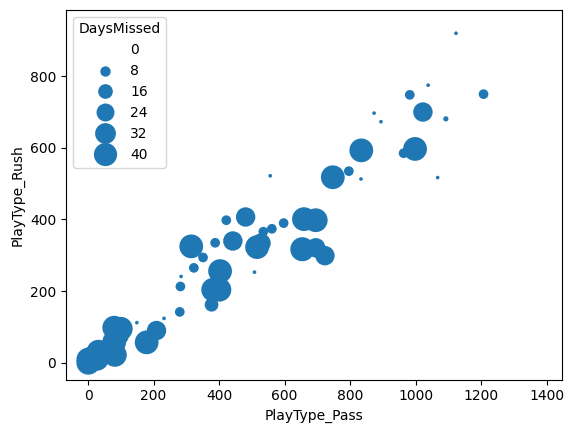

In [32]:
x = 'PlayType_Pass'
y = 'PlayType_Rush'
z = 'DaysMissed'
data = player_summary[player_summary[x] > 0]
maxbubble = 300
sns.scatterplot(data=data, x=x, y=y, size = z, sizes = (data[z].min() / data[z].max() * maxbubble, maxbubble))

In [35]:
# PCA
pca = decomposition.PCA(n_components = 3)
pca.fit(player_summary.drop(columns=['PlayerKey', 'Position']))
print(f'Explained Variance by Comp: {pca.explained_variance_ratio_}')
for i in range(len(pca.components_)):
    print(f"Comp {i}: {pca.components_[i]}")

Explained Variance by Comp: [0.95180747 0.02468785 0.01416635]
Comp 0: [ 1.89803705e-02  1.54715052e-02 -2.57822861e-02 -2.57974829e-02
 -1.53298010e-02  8.37403361e-01 -2.29151528e-02 -1.62378517e-02
 -1.34770924e-02  5.43672841e-01 -6.09225037e-05 -1.49544656e-04
 -4.50188102e-05 -5.82990879e-06 -1.59618441e-04 -6.33505744e-03]
Comp 1: [ 1.24757674e-01  1.09901694e-01  1.00539628e-01  6.91509359e-02
  3.68733652e-02 -5.21475015e-01  1.28159189e-01  6.69546195e-02
  4.29282692e-02  8.13069807e-01 -3.65413368e-04 -2.60361293e-06
 -1.41948696e-04 -6.62579292e-05 -1.59810356e-04 -1.83849451e-02]
Comp 2: [ 1.17458995e-01  1.13049804e-01  5.45168959e-01  3.78954023e-01
  2.25324711e-01  1.57861548e-01  5.66056647e-01  2.63793633e-01
  1.98247078e-01 -1.63942246e-01  3.00151289e-04 -4.61126552e-04
 -3.29582338e-04 -8.81906850e-05  2.56797760e-04 -2.70116593e-02]


In [36]:
player_summary.columns

Index(['PlayerKey', 'PlayType_Extra Point', 'PlayType_Field Goal',
       'PlayType_Kickoff', 'PlayType_Kickoff Not Returned',
       'PlayType_Kickoff Returned', 'PlayType_Pass', 'PlayType_Punt',
       'PlayType_Punt Not Returned', 'PlayType_Punt Returned', 'PlayType_Rush',
       'Surface_Natural', 'Surface_Synthetic', 'BodyPart_Ankle',
       'BodyPart_Foot', 'BodyPart_Knee', 'DaysMissed', 'Position'],
      dtype='object')

In [38]:
# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


feature_sets = [['PlayType_Extra Point', 'PlayType_Field Goal', 'PlayType_Kickoff', 
 'PlayType_Kickoff Not Returned', 'PlayType_Kickoff Returned', 
 'PlayType_Pass', 'PlayType_Punt', 'PlayType_Punt Not Returned', 
 'PlayType_Punt Returned', 'PlayType_Rush', 'Surface_Natural', 
 'Surface_Synthetic', 'BodyPart_Ankle', 'BodyPart_Foot', 'BodyPart_Knee'],
 ['PlayType_Extra Point', 'PlayType_Pass', 'PlayType_Rush', 
 'BodyPart_Ankle', 'BodyPart_Foot', 'BodyPart_Knee'],
 ['PlayType_Extra Point', 'PlayType_Field Goal', 'PlayType_Kickoff', 
 'PlayType_Pass', 'PlayType_Rush', 'Surface_Natural', 'Surface_Synthetic']
]

mse_sets = []
for set in feature_sets:
    x_train, x_test, y_train, y_test = train_test_split(player_summary[set], player_summary['DaysMissed'], test_size=.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    mse_sets.append(mean_squared_error(y_test, preds))
mse_sets

[47.636223519426494, 55.29368092499811, 72.56690519678746]

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

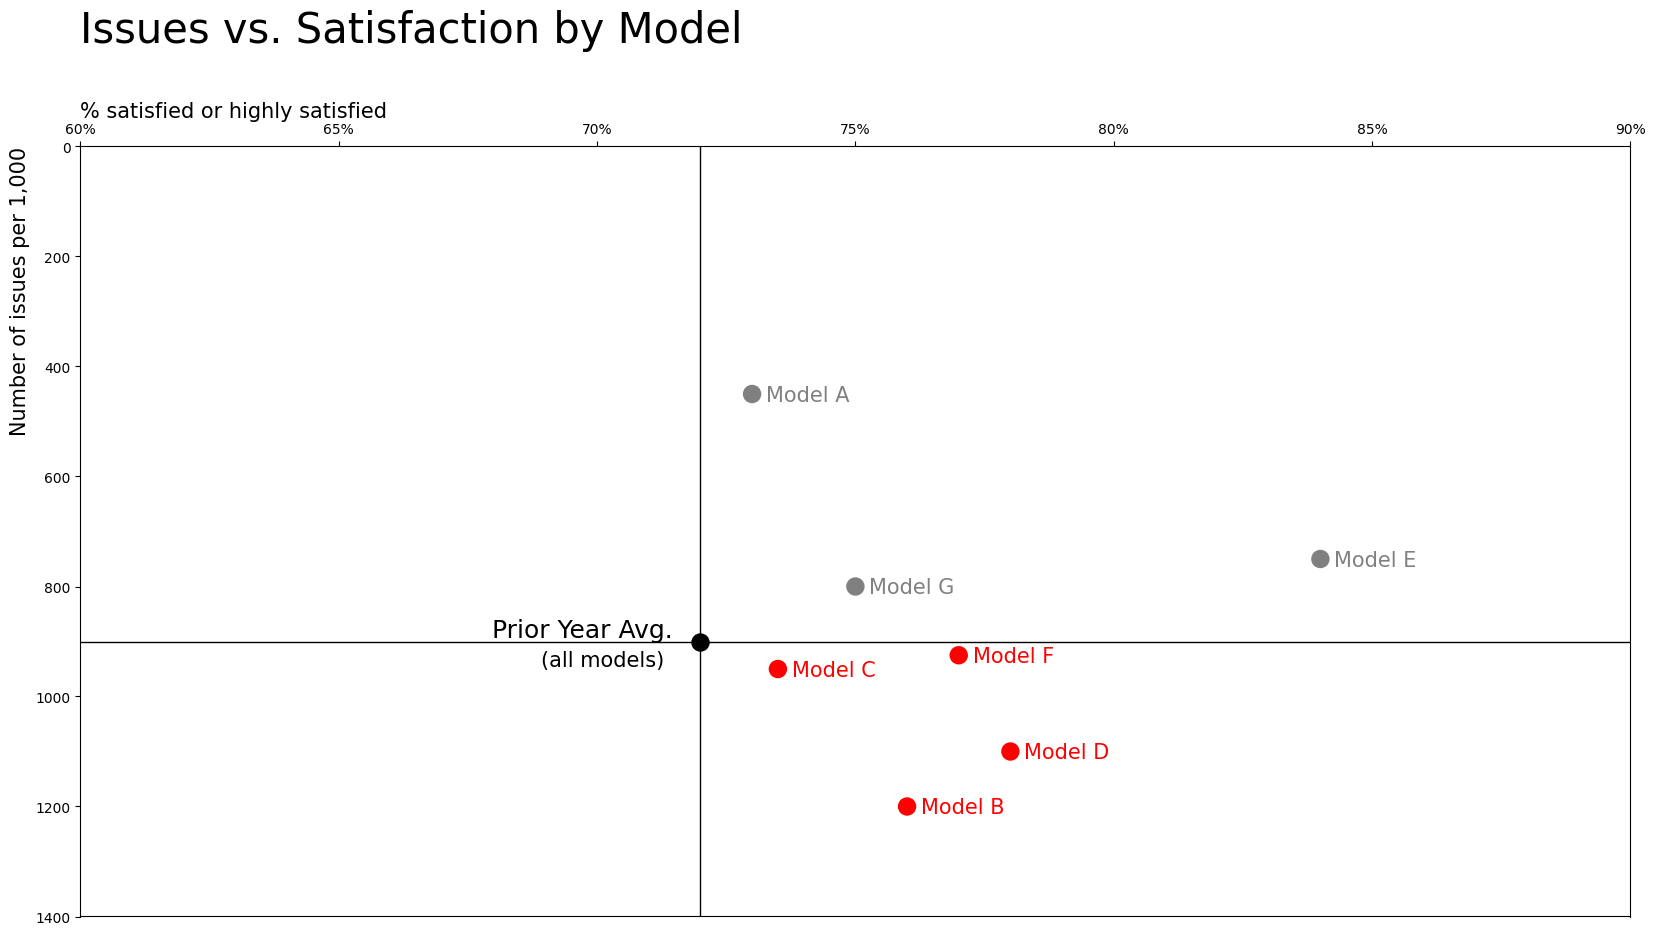

In [3]:
import matplotlib.pyplot as plt

# Create data, labels, ticks
x = np.array([.73, .76, .735, .78, .84, .77, .75])
y = np.array([450, 1200, 950, 1100, 750, 925, 800])
labels = np.array([f'Model {a}' for a in ['A', 'B', 'C', 'D', 'E', 'F', 'G']])
xticks = [.6+(x*.05) for x in range(7)]
yticks = [y*200 for y in range(8)]
xticks_labels = ['60%', '65%', '70%', '75%', '80%', '85%', '90%']
colors=['gray', 'red', 'red', 'red', 'gray', 'red', 'gray']

# Create figure
plt.figure(figsize=(20,10))
plt.scatter(x, y, c=colors, s=150)
plt.scatter([.72], [900], c=['black'], s=150)
plt.title('Issues vs. Satisfaction by Model', fontsize=30, loc='left', pad=75)

# Fix Axis and labels and ticks
plt.xlabel('% satisfied or highly satisfied', loc='left', fontsize=15)
plt.ylabel('Number of issues per 1,000', loc='top', fontsize=15)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.xticks(xticks, xticks_labels)
plt.yticks(yticks)

# Add average lines label points
for i in range(len(x)):    
    plt.annotate(labels[i],(x[i], y[i]),textcoords="offset points",xytext=(10, -5),ha='left', fontsize=15, c=colors[i])
plt.annotate('Prior Year Avg.',(.72, 900), textcoords="offset points", xytext=(-150, 3),ha='left', fontsize=18, c='black')
plt.annotate('(all models)',(.72, 900), textcoords="offset points", xytext=(-115, -18),ha='left', fontsize=15, c='black')
plt.axhline(900, color='black', linewidth=1)
plt.axvline(0.72, color='black', linewidth=1)

# Add extra text


plt.show()